Total Points = 20

10 code  blocks to be completed

Each code block is of 2 points

# Support Vector Regression using synthetic data

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Create a nonlinear function

In [25]:
def nonlinear(array):
    return (10*array[:,0]-np.exp(0.01*array[:,1]+np.log(1+array[:,2]**2)))/(array[:,3]**2+5)

Generate features and target data for regression

In [26]:
n_samples = 1000
n_features = 6

In [27]:
x = 6*np.random.rand(n_samples,n_features)

In [28]:
y = nonlinear(x)+np.random.randn(n_samples)

In [29]:
y=y.reshape(n_samples,1)

In [30]:
display(x)
display(y)
display(x.shape)
display(y.shape)

array([[5.13726206, 1.24815127, 1.28585563, 1.23096821, 5.99429069,
        5.72645612],
       [2.19550261, 2.27671855, 2.739064  , 0.22526221, 1.2616326 ,
        2.55729366],
       [2.87373245, 1.67508946, 5.13216982, 0.70277422, 4.24645399,
        4.80605916],
       ...,
       [4.61581763, 4.34208644, 0.36903224, 3.63286811, 3.27990387,
        4.56278787],
       [1.75829734, 0.05778683, 5.95903276, 3.55143324, 1.93134897,
        1.98696954],
       [3.90270721, 3.16208726, 2.32473587, 1.59333784, 3.86246352,
        2.81196608]])

array([[ 7.22935682e+00],
       [ 1.23416322e+00],
       [-2.41129984e-01],
       [ 4.99198126e+00],
       [-4.16224445e-01],
       [ 1.12906176e+01],
       [-9.05409399e-01],
       [-3.12243493e+00],
       [ 6.87640322e-01],
       [-5.66016867e-01],
       [ 3.19349390e+00],
       [ 3.12277563e+00],
       [ 1.08500024e+00],
       [-1.09819876e+00],
       [ 1.59903559e+00],
       [ 3.15434514e-01],
       [ 2.33927422e+00],
       [ 1.14019698e+00],
       [ 2.52069434e+00],
       [-2.10030936e+00],
       [ 2.17849484e+00],
       [ 2.56931284e-01],
       [ 9.98366268e-01],
       [ 2.08669830e-01],
       [-2.11628741e-01],
       [ 2.23774361e+00],
       [ 1.54310980e+00],
       [ 2.39527227e+00],
       [ 2.83291880e+00],
       [-3.34580023e+00],
       [ 3.28393899e+00],
       [ 7.18248751e-01],
       [-1.12314112e-01],
       [ 4.68050300e-01],
       [-2.52247779e-01],
       [-9.16381073e-01],
       [ 1.46852505e+00],
       [ 2.76345303e+00],
       [ 1.3

(1000, 6)

(1000, 1)

In [31]:
# Add code below
# read x and y arrays into a dataframe 'df_synthetic' , label the target as 'y' in the dataframe
df_synthetic = pd.DataFrame(x)
df_synthetic['y']=y
display(df_synthetic)

,0,1,2,3,4,5,y
0,5.137262,1.248151,1.285856,1.230968,5.994291,5.726456,7.229357
1,2.195503,2.276719,2.739064,0.225262,1.261633,2.557294,1.234163
2,2.873732,1.675089,5.132170,0.702774,4.246454,4.806059,-0.241130
3,4.273085,5.941746,0.752822,1.582611,1.100792,0.558345,4.991981
4,3.409079,3.008793,4.763601,3.606033,5.586827,2.271570,-0.416224
...,...,...,...,...,...,...,...
995,0.202661,4.006188,3.693499,3.470514,0.758908,5.930058,-0.267831
996,2.280660,4.595243,0.656845,1.548079,4.788194,4.272471,1.382203
997,4.615818,4.342086,0.369032,3.632868,3.279904,4.562788,4.247411
998,1.758297,0.057787,5.959033,3.551433,1.931349,1.986970,-3.683162


Plot the data - Uncomment the following cell

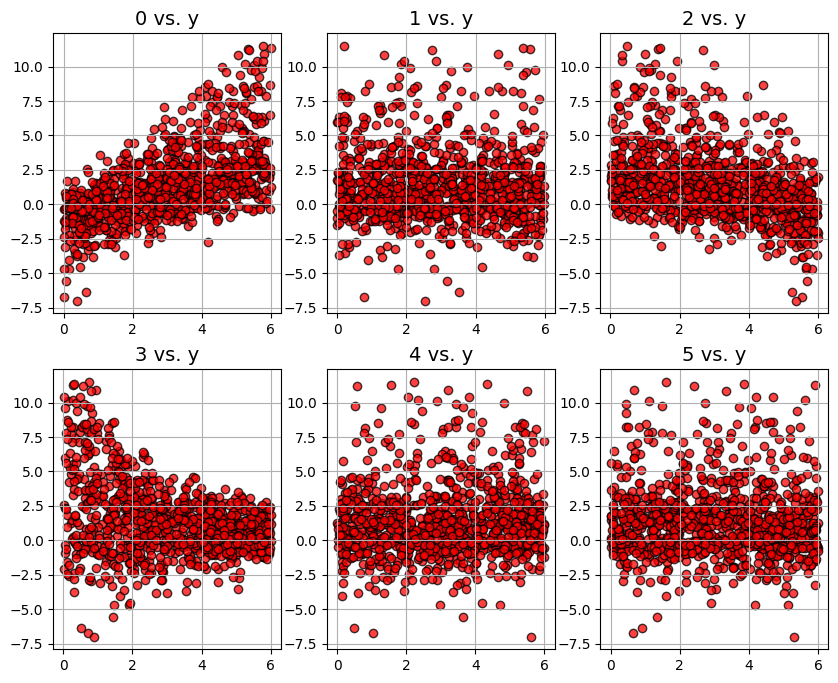

In [32]:
fig,ax = plt.subplots(2,3,figsize=(10,8))
ax = ax.ravel()
for i in range(6):
   ax[i].scatter(df_synthetic[df_synthetic.columns[i]],df_synthetic['y'],edgecolor='k',color='red',alpha=0.75)
   ax[i].set_title(f"{df_synthetic.columns[i]} vs. y",fontsize=14)
   ax[i].grid(True)
plt.show()

In [33]:
# Add code below

# Perform test train split of the dataframe 'df_synthetic'
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(df_synthetic, test_size=0.2)

Support vector regressor with linear kernel

In [35]:
y_train = x_train['y']
y_test = x_test['y']
x_train.drop(labels='y', axis=1, inplace=True)
x_test.drop(labels='y', axis=1, inplace=True)
print(x_train.shape)
print(x_test.shape)

(800, 6)
(200, 6)


In [40]:
# Add code below
# Create linear support vector regressor model and fit it on the dataset
from sklearn.svm import LinearSVR
svr = LinearSVR()

svr.fit(x_train, y_train)
y_pred=svr.predict(x_test)
print(y_test.shape)
print(y_pred.shape)

(200,)
(200,)


/home/ayush/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [41]:
# Add code below
# Display the R2 score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6046180278424205

In [42]:
# Add code below

# Build a linear regressor on the above dataset and report its R2 score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr=lr.predict(x_test)
print(y_test.shape)
print(y_pred_lr.shape)

(200,)
(200,)


In [43]:
r2_score(y_test, y_pred_lr)

0.6178019713699463

Support vector regressor with RBF kernel

In [44]:
#Add code below

# Use RBF kernel with default values and perform support vector regression
from sklearn.svm import SVR

model_svr = SVR(kernel='rbf')
model_svr.fit(x_train, y_train)
y_pred_svr = model_svr.predict(x_test)
print(y_test.shape)
print(y_pred_svr.shape)

(200,)
(200,)


In [45]:
# Add code below
# Report R2 score of the above model
r2_score(y_test, y_pred_svr)


0.7996801660528285

In [53]:
# Add code below

# Perform grid search of hyperparameters - cost C and epsilon, keep gamma at 'scale' (with cross-validation) to see if the test/validation score be improved

# specify model

from sklearn.model_selection import GridSearchCV
grid_search_cv = GridSearchCV(SVR(),  {'C': [1.0, 1.5, 2, 2.5], 'epsilon': [0.1, 0.2, 0.3],'gamma': ['scale'], 'kernel': ['rbf','linear']}, cv = 5, scoring = 'r2', verbose =1, n_jobs = -1)
grid_search_cv.fit(x_train, y_train)



Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [1.0, 1.5, 2, 2.5], 'epsilon': [0.1, 0.2, 0.3],
                         'gamma': ['scale'], 'kernel': ['rbf', 'linear']},
             scoring='r2', verbose=1)

In [54]:
# Add code below

# Check best model by the grid search and display it
display(grid_search_cv.best_score_)
display(grid_search_cv.best_params_)

0.8027257985037174

{'C': 2.5, 'epsilon': 0.3, 'gamma': 'scale', 'kernel': 'rbf'}

In [56]:
# Add code below

# Fit that model to the data and check the R2 score
model_svr_best = SVR(kernel='rbf',C=2.5, epsilon= 0.3, gamma = 'scale')
model_svr_best.fit(x_train, y_train)
y_pred_svr_best= model_svr_best.predict(x_test)
r2_score(y_test, y_pred_svr_best)


0.8074542353377863